Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

#Need code to start engine 
#create Education dataframe
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

## Q1) Determine all the variable types and find the fraction of the missing values for each variable.

In [5]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

Most variables are datatype 'float'. 

In [7]:
#Are we finding all values that are 'False' b/c of 'null' and dividing by total to get denominator
education_df.isnull().sum()/education_df.count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.213995
TOTAL_REVENUE                   0.165625
FEDERAL_REVENUE                 0.165625
STATE_REVENUE                   0.165625
LOCAL_REVENUE                   0.165625
TOTAL_EXPENDITURE               0.165625
INSTRUCTION_EXPENDITURE         0.165625
SUPPORT_SERVICES_EXPENDITURE    0.165625
OTHER_EXPENDITURE               0.213995
CAPITAL_OUTLAY_EXPENDITURE      0.165625
GRADES_PK_G                     0.131160
GRADES_KG_G                     0.097059
GRADES_4_G                      0.096253
GRADES_8_G                      0.096253
GRADES_12_G                     0.096253
GRADES_1_8_G                    0.096253
GRADES_9_12_G                   0.096253
GRADES_ALL_G                    0.131160
AVG_MATH_4_SCORE                1.783582
AVG_MATH_8_SCORE                1.804511
AVG_READING_4_SCORE             1.799250
AVG_READING_8_SC

2) Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables.  For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


In [8]:
#make a copy of df
education2_df = education_df.copy()

### Option 1 is to disregard. Option 2 is to fill in using fill.na function, which is preferred and more common approach in dealing with missing values for data science. By replacing the missing values with some other value, we keep all data points in place, and we can benefit from the info hese records provide. We can impute by using the mean to fill in missing values.

In [15]:
#Imputing w/mean function
fill_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
             'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for col in fill_list:
    
    education2_df.loc[:,col] = education2_df.loc[:,col].fillna(education2_df.loc[:,col].mean())
    print(education2_df)

             PRIMARY_KEY          STATE  YEAR         ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992  915930.820993   2.678885e+06   
1            1992_ALASKA         ALASKA  1992  915930.820993   1.049591e+06   
2           1992_ARIZONA        ARIZONA  1992  915930.820993   3.258079e+06   
3          1992_ARKANSAS       ARKANSAS  1992  915930.820993   1.711959e+06   
4        1992_CALIFORNIA     CALIFORNIA  1992  915930.820993   2.626002e+07   
...                  ...            ...   ...            ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017  915930.820993   9.092082e+06   
1488     2017_WASHINGTON     WASHINGTON  2017  915930.820993   9.092082e+06   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017  915930.820993   9.092082e+06   
1490      2017_WISCONSIN      WISCONSIN  2017  915930.820993   9.092082e+06   
1491        2017_WYOMING        WYOMING  2017  915930.820993   9.092082e+06   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE

3) Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [16]:
education3_df = education_df.copy()

In [19]:
#Imputing w/mean function from specific year
fill_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
             'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

years = education3_df["YEAR"].unique()
for col in fill_list:
    for year in years:
        
        education3_df.loc[education3_df['YEAR'] == year, col] = education3_df.loc[education3_df["YEAR"] == year, col].fillna(
            education3_df[education3_df["YEAR"] == year][col].mean())  
        print(education3_df)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017     NaN            NaN   
1488     2017_WASHINGTON     WASHINGTON  2017     NaN            NaN   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017     NaN            NaN   
1490      2017_WISCONSIN      WISCONSIN  2017     NaN            NaN   
1491        2017_WYOMING        WYOMING  2017     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

4) This time, fill in the missing values using interpolation (extrapolation).

In [20]:
education4_df = education_df.copy()

In [27]:
for col in fill_list:
    education4_df.loc[:,col] = education4_df.loc[:,col].interpolate()  
    print(education4_df)

             PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992        NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992        NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992        NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992        NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992        NaN     26260025.0   
...                  ...            ...   ...        ...            ...   
1487       2017_VIRGINIA       VIRGINIA  2017  1595024.0     23766529.0   
1488     2017_WASHINGTON     WASHINGTON  2017  1595024.0     23766529.0   
1489  2017_WEST_VIRGINIA  WEST_VIRGINIA  2017  1595024.0     23766529.0   
1490      2017_WISCONSIN      WISCONSIN  2017  1595024.0     23766529.0   
1491        2017_WYOMING        WYOMING  2017  1595024.0     23766529.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0    

5) Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [28]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

"ENROLL" has same minimum, but the SD's vary. Second method of taking the mean to fill in missing values shows the highest median, or 50th quartile, rank. 

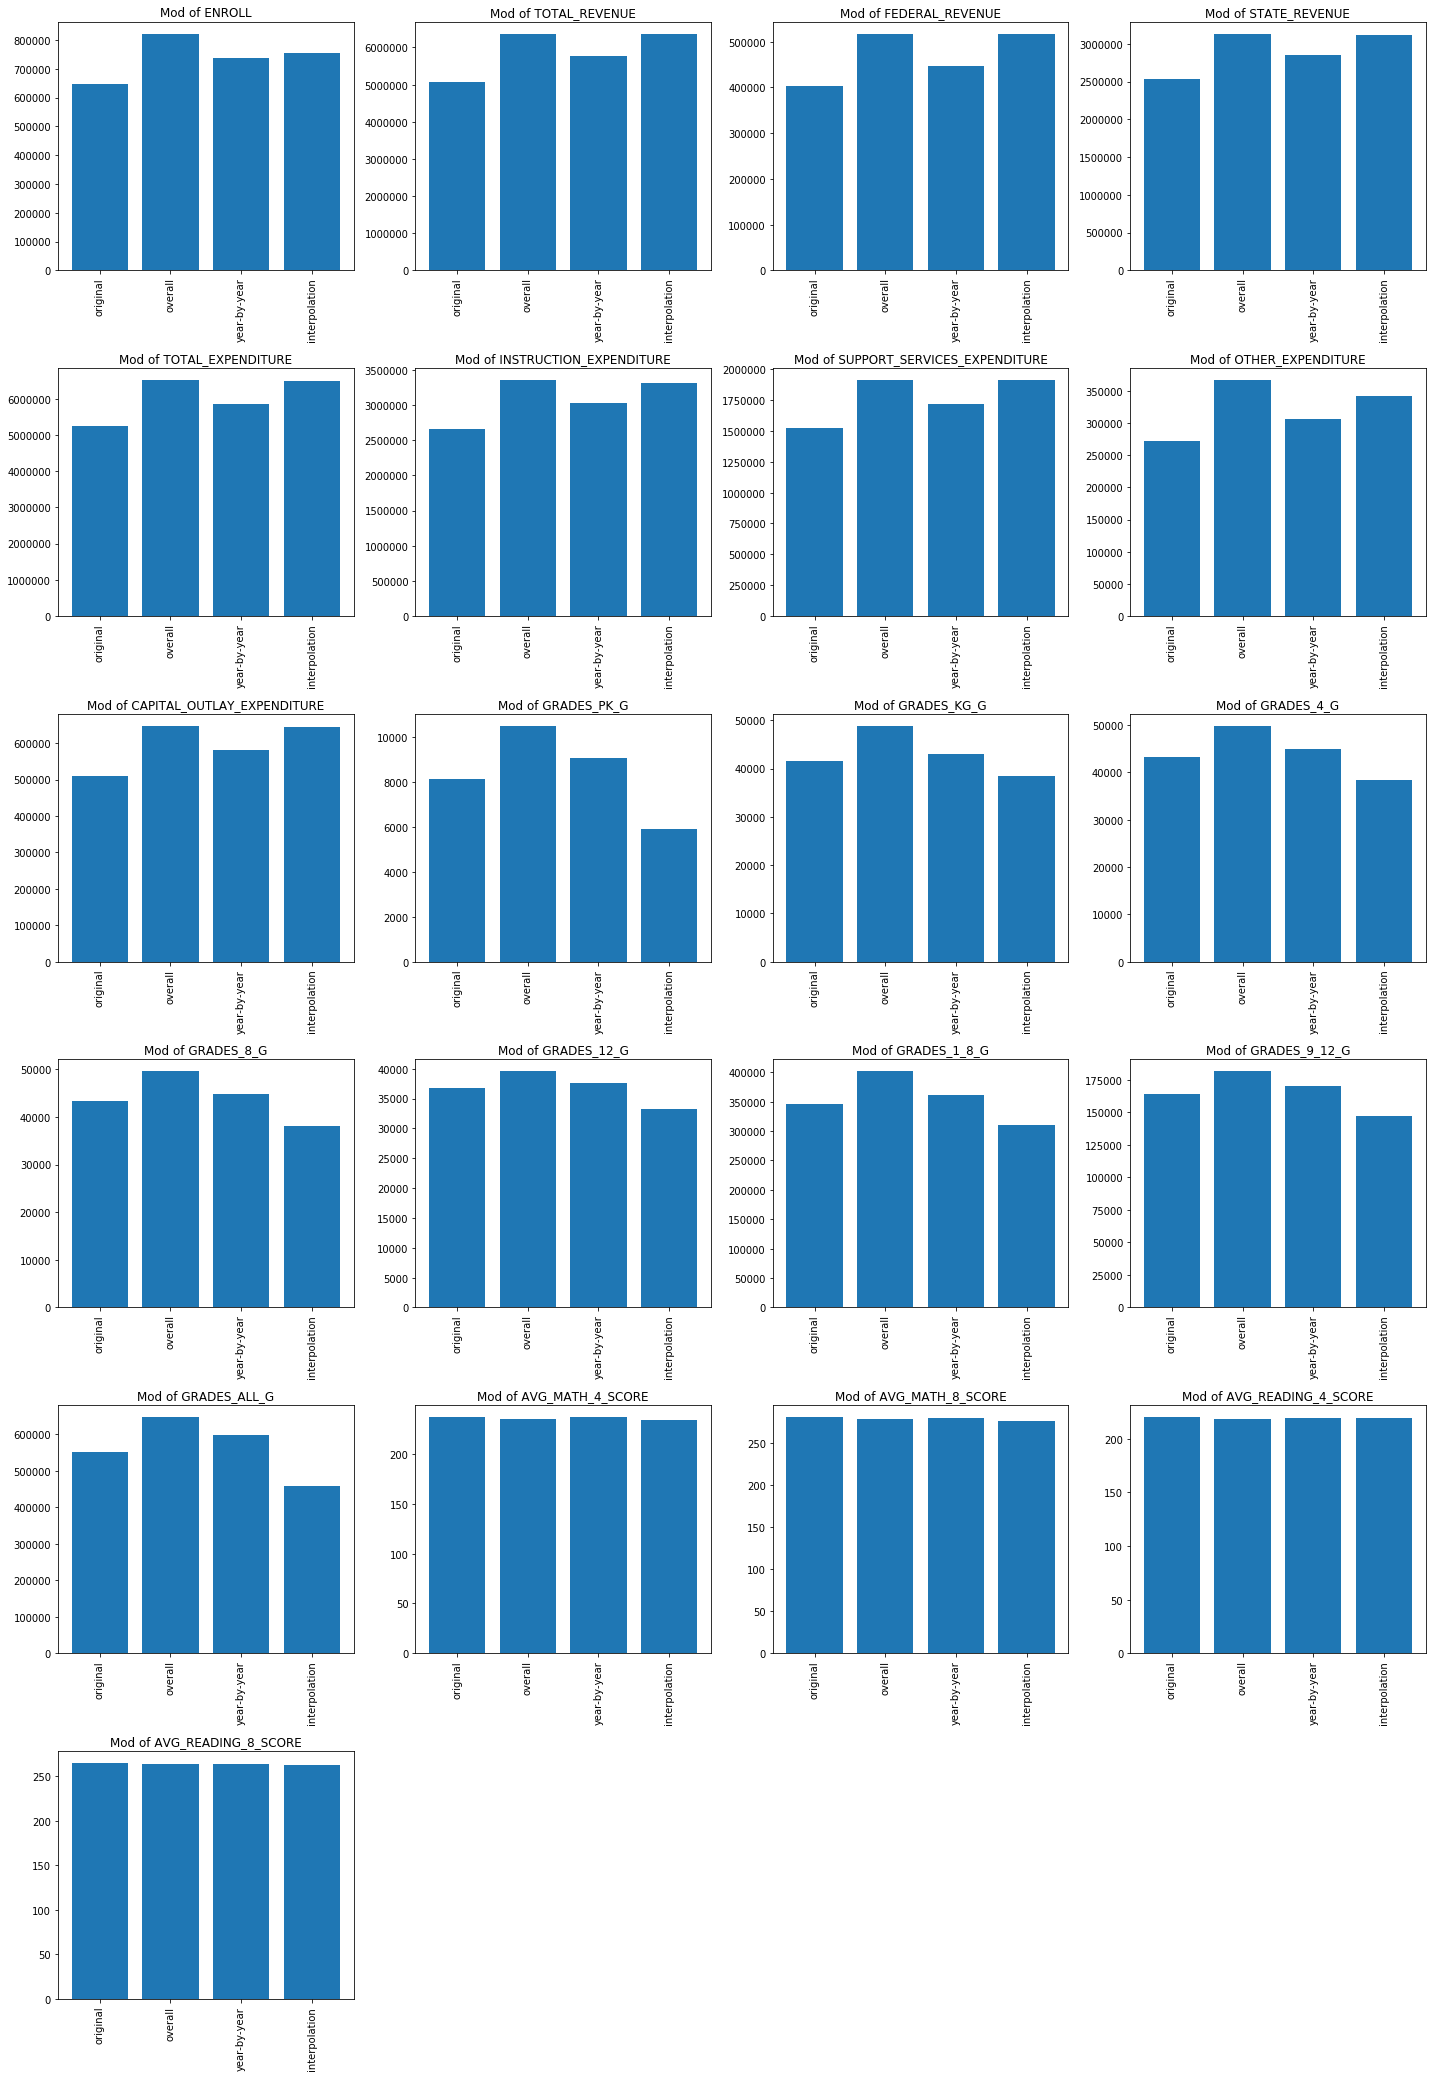

In [29]:
#Concatenate all data frames for comparison
#Where does "enumerate" come from? and why i+1? 
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([education_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()